# INTELIGENCIA ARTIFICIAL (1INF24\)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)


# REDUCCION DIMENSIONAL

## Selección de Atributos

La tarea de selección de atributos consiste en identificar y seleccionar un subconjunto de atributos que mejor contribuyan a predecir una variable de interes. Tener atributos irrelevantes puede generar un modelo innecesariamente complejo, eleva el tiempo de procesamiento y puede generar una disminución de la precisión de predicción.

### Selección de atributos con Filtros

En seleccion de atributos univariada se aplica test estadísticos para medir el grado de asociación de cada variable (individualmente) con respecto a la variable de interes. Un test frecuentemente usado es Chi cuadrado (para clasificacion). La libreria sklearn provee la clase feature_selection que tiene várias funciones para seleccion de atributos univariada, entre ellos <b>chi2()</b> (calcula la estadistica Chi2)  y <b>SelectKBest</b> (selecciona K atributos con mejores valores del test estadístico). Veamos un ejemplo:      

In [ ]:
# Seleccion de atributos univariada para clasificación

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
np.set_printoptions(precision=2)   # setea para que solo se impriman 2 decimales

# carga el dataset pima-indians-diabetes
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data_diabetes = pd.read_csv(filename, names=names)

# separa los atributos y el target
array = data_diabetes.values
X = array[:,0:8]  #atributos
y = array[:,8]    #target

In [ ]:
# selecciona 3 atributos con chi2
fit_selector = SelectKBest(score_func=chi2, k=4).fit(X, y)

# muestra resultados de seleccion
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Scores de Atributos: {}".format(fit_selector.scores_))

Atributos Seleccionados: [1 4 5 7]
Scores de Atributos: [ 111.52 1411.89   17.61   53.11 2175.57  127.67    5.39  181.3 ]


In [ ]:
# obtiene la data reducida (solo atributos seleccionados)
X_filtered_chi2 = fit_selector.transform(X)
print(X_filtered_chi2)

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


Otras estadísticas que se pueden usar para clasificacion son: ANOVA F-value (<b>f_classif</b>), Mutual information (<b>mutual_info_classif</b>). Para regresión se puede usar estadisticas: F-value (<b>f_regression</b>), Mutual information for a continuous target (<b>mutual_info_regression</b>)

### Seleccion Wrapper:  Recursive Feature Elimination

El método RFE (Recursive Feature Elimination) remueve recursivamente atributos. Al inicio se entrena un predictor con todos los atributos y se calcula la importancia de cada atributo. El atributo con menos importancia es eliminado. El proceso es repetido hasta que se obtenga un numero deseado de atributos. El modulo feature_selection de sklearn provee la funcion <b>RFE()</b> que implementa dicho método.

Veamos un ejemplo en el dataset  pima-indians-diabetes con un regresor logistico como predictor:

In [ ]:
# Selección de atributos con  RFE

import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# carga el dataset pima-indians-diabetes
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)

# separa atributos del target
array = dataframe.values
X = array[:,0:8]  #atributos
y = array[:,8]    #target

In [ ]:
# aplica RFE con algoritmo Logistic Regression como evaluador de atributos. Se le pide los mejores 4 atributos
predictor = LogisticRegression(max_iter=200)  # define modelo predictor (regresor logistico)
rfe = RFE(predictor, n_features_to_select=3)    # instancia objeto RFE
fit_selector = rfe.fit(X, y)    # ejecuta el algoritmo RFE con la data pasada

print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

Numero de Atributos: 3
Atributos Seleccionados: [0 5 6]
Ranking de Atributos: [1 2 4 6 5 1 1 3]


In [ ]:
# obtiene la data reducida (solo atributos seleccionados)
X_filtered_RFE = fit_selector.transform(X)
print(X_filtered_RFE)

[[ 6.   33.6   0.63]
 [ 1.   26.6   0.35]
 [ 8.   23.3   0.67]
 ...
 [ 5.   26.2   0.24]
 [ 1.   30.1   0.35]
 [ 1.   30.4   0.32]]


Aqui un ejemplo de seleccion de atributos para regresion con un dataset artificial contruido (con make_friedman1() de sklearn) y estimador SVR. En ese dataset los atributos relevantes son los 5 primeros, los demas son independientes de la variable de salida:

y(X) = 10 * sin( pi*X[:, 0] * X[:, 1] ) +  20*(X[:, 2]-0.5) ^ 2 + 10*X[:, 3] + 5*X[:, 4] + noise * N(0, 1).

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Genera artificialmente 100 ejemplos de 20 features con make_friedman1
X, y = make_friedman1(n_samples=100, n_features=20, random_state=0)

In [ ]:
# aplica RFE con predictor SVR
predictor = SVR(kernel="linear") # define modelo predictor (support vector regression)
rfe = RFE(predictor, n_features_to_select=5)  # instancia objeto RFE
fit_selector = rfe.fit(X, y)   # ejecuta el algoritmo RFE con la data pasada

print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

Numero de Atributos: 5
Atributos Seleccionados: [0 1 3 4 5]
Ranking de Atributos: [ 1  1  5  1  1  1  4  8 15  7 13  2 12  3 11 16 14  9 10  6]


### Seleccion Embedding

Algunos tipos de modelos, como los basados en Ensambles (ej. Random Forest, ExtraTrees), tienen la capacidad de estimar implicitamente en el proceso de aprendizaje la importancia relativa de los atributos. Este tipo de seleccion se le conoce como seleccion embebida (Embedding). En la libreria sklearn se puede recuperar dicha informacion en el campo <b>.feature_importances_</b> del modelo ajustado. Veamos un ejemplo en el dataset  pima-indians-diabetes:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# carga el dataset pima-indians-diabetes
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)

# separa atributos y target
array = dataframe.values
X = array[:,0:8]  #atributos
y = array[:,8]    #target

In [ ]:
# entrena un modelo RandomForest y muestra la importancia de los atributos
modelo = RandomForestClassifier().fit(X, y)
#modelo.fit(X, y)
print(modelo.feature_importances_)

[0.08 0.26 0.09 0.07 0.07 0.16 0.13 0.14]


Se puede apreciar que el modelo le está dando más importancia a los atributos 'plas', 'mass' y 'age'

## Transformación de Atributos  con PCA

PCA (Principal Component Analysis) es una tecnica que transforma el dataset en una forma comprimida. En PCA se puede especificar la cantidad de atributos transformados (componentes). PCA se encuentra implementado en sklearn.decomposition. Veamos un ejemplo en el dataset  pima-indians-diabetes:

In [1]:
# Extracción de atributos con PCA

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA  # para hacer la transformacion PCA
from sklearn.preprocessing import StandardScaler   # para estandarizar

# carga el dataset pima-indians-diabetes
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)

# separa atributos y target
array = dataframe.values
X = array[:,0:8]  #atributos
y = array[:,8]    #target

In [2]:
# Define el operador de estandarizacion (estandarizador) para estandarizar columnas de X
standardizer = StandardScaler()

# Estandariza las columnas de X.
standardizedX = standardizer.fit_transform(X)  # realiza la estandarizacion de X. El resultado es un array numpy

In [3]:
# aplica transformacion PCA
pca = PCA(n_components=8)
fit_pca = pca.fit(standardizedX)
X_transformed_pca = fit_pca.transform(standardizedX)

# muestra resultados de transformacion PCA
print("Ratio de varianza expplicada: {}".format(fit_pca.explained_variance_ratio_))

Ratio de varianza expplicada: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [4]:
X_transformed_pca

array([[ 1.06850273,  1.23489499, -0.09592984, ...,  0.35718251,
         0.85882133,  0.97430355],
       [-1.12168331, -0.73385167,  0.71293816, ..., -0.40632934,
         0.75703403,  0.35421454],
       [-0.39647671,  1.59587594, -1.76067844, ..., -0.04001752,
        -1.15299029,  1.06852795],
       ...,
       [-0.28347525,  0.09706503,  0.07719194, ..., -0.53826993,
        -0.33556321,  0.2894389 ],
       [-1.06032431,  0.83706234, -0.42503045, ...,  0.15330712,
         1.18030813, -0.53434386],
       [-0.83989172, -1.15175485,  1.00917817, ..., -0.15009639,
         0.24523536,  0.51594622]])

In [5]:
print("Componentes principales:")
print(fit_pca.components_)

Componentes principales:
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [ 0.01308692 -0.46792282  0.53549442  0.2376738  -0.33670893  0.36186463
  -0.43318905 -0.07524755]
 [ 0.08069115 -0.40432871  0.05598649  0.03797608 -0.34994376  0.05364595
   0.8336801   0.0712006 ]
 [ 0.47560573 -0.46632804 -0.32795306  0.48786206  0.34693481 -0.25320376
  -0.11981049  0.10928996]
 [ 0.19359817  0.09416176 -0.6341159   0.00958944 -0.27065061  0.68537218
  -0.08578409 -0.03335717]
 [-0.58879003 -0.06015291 -0.19211793  0.28221253 -0.13200992 -0.03536644
  -0.08609107  0.71208542]
 [ 0.11784098  0.45035526 -0.01129554  0.5662838  -0.54862138 -0.34151764
  -0.00825873 -0.21166198]]


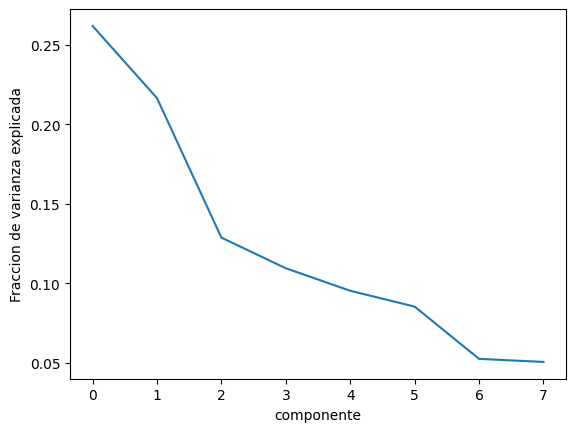

In [6]:
import matplotlib.pyplot as plt
plt.plot( fit_pca.explained_variance_ratio_ )
plt.xlabel('componente')
plt.ylabel('Fraccion de varianza explicada')
plt.show()

Visualiza los datos transformados

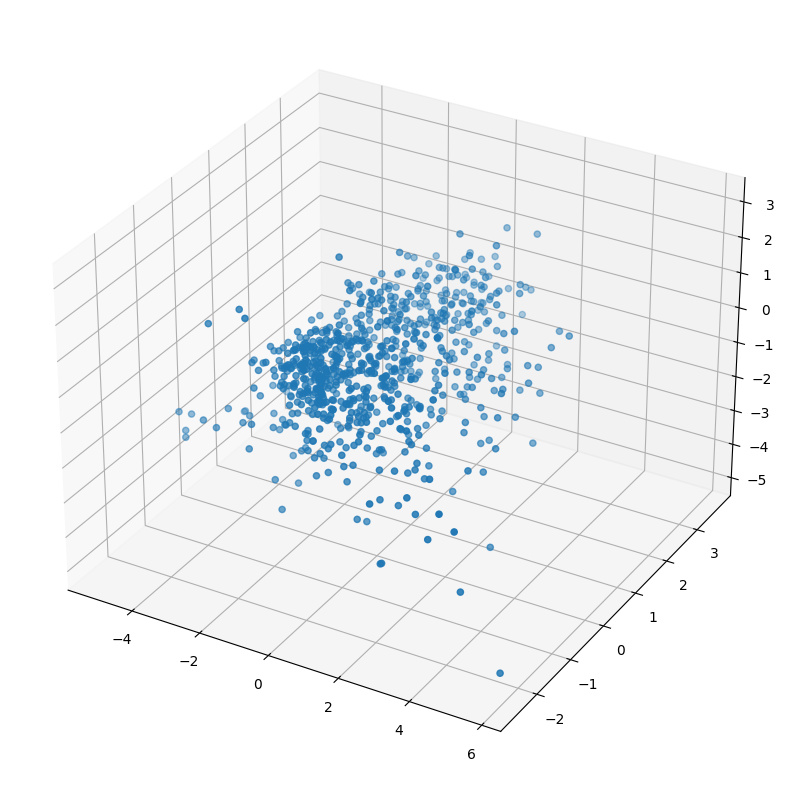

In [7]:
# por conveniencia castea la data en un DataFrame
X_transformed_pca = pd.DataFrame(X_transformed_pca)

# realiza un scatter plot con las 3 primeras componentes PCA
plot3d = plt.figure(figsize=[10, 10]).add_subplot(projection='3d')
plot3d.scatter(X_transformed_pca[0], X_transformed_pca[1], X_transformed_pca[2])
plt.show()